In [1]:
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
import glob

import matplotlib.patches as mpatches
import matplotlib.colors as colors

In [2]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [3]:
targetted_txt_files = np.array(glob.glob('../data/TargettedTesting/*.txt'))


print(len(targetted_txt_files))
print(targetted_txt_files)

print(targetted_txt_files[0].split("_")[8])

6950
['../data/TargettedTesting/OnlyI-Targetted_Testing_BeginAt_10_DTR_0.5_RAT_0.95_0.6_PCR_1.0_0.4_201011091723729190.txt'
 '../data/TargettedTesting/OnlyI-Targetted_Testing_BeginAt_10_DTR_0.1_RAT_0.95_0.8_PCR_1.0_0.2_201011013500784802.txt'
 '../data/TargettedTesting/OnlyI-Targetted_Testing_BeginAt_10_DTR_0.5_RAT_0.95_0.2_PCR_1.0_0.8_201011031705345768.txt'
 ...
 '../data/TargettedTesting/OnlyI-Targetted_Testing_BeginAt_10_DTR_0.5_RAT_0.9_0.2_PCR_1.0_0.8_201011015737557443.txt'
 '../data/TargettedTesting/OnlyI-Targetted_Testing_BeginAt_10_DTR_0.5_RAT_0.85_0.2_PCR_1.0_0.8_201011061858316179.txt'
 '../data/TargettedTesting/OnlyI-Targetted_Testing_BeginAt_10_DTR_0.5_RAT_0.9_1.0_PCR_1.0_0.0_201011053502786527.txt']
0.6


In [4]:
def split_sensitivity(files, choice):
    # split by sensitivities

    point7 = []
    point75 = []
    point8 = []
    point85 = []
    point9 = []
    point95 = []
    point10= []
    
    for i in range(0,len(files)):
        if(files[i].split("_")[7] == "0.7"):
            point7.append(files[i])
        elif(files[i].split("_")[7] == "0.75"):
            point75.append(files[i])
        elif(files[i].split("_")[7] == "0.8"):
            point8.append(files[i])
        elif(files[i].split("_")[7] == "0.85"):
            point85.append(files[i])
        elif(files[i].split("_")[7] == "0.9"):
            point9.append(files[i])
        elif(files[i].split("_")[7] == "0.95"):
            point95.append(files[i])
        elif(files[i].split("_")[7] == "1.0"):
            point10.append(files[i])
        
#### Now all files are split into these different sensitivities.
    
    if(choice == 0.7):
        return np.array(point7)
    elif(choice == 0.75):
        return np.array(point75)
    elif(choice == 0.8):
        return np.array(point8)
    elif(choice == 0.85):
        return np.array(point85)
    elif(choice == 0.9):
        return np.array(point9)
    elif(choice == 0.95):
        return np.array(point95)
    elif(choice == 10.0):
        return np.array(point10)
    else:
        print("Invalid choice")

In [5]:
def split_test_rate(files, choice):
    # split by test-rates

    zero = []
    one  = []
    two  = []
    four = []
    five = []
    six  = []
    eight= []
    ten  = []
    
    for i in range(0,len(files)):
        if(files[i].split("_")[5] == "0.1"):
            one.append(files[i])
        elif(files[i].split("_")[5] == "0.5"):
            five.append(files[i])
            
#### Now all files are split into these different daily test rates.
    
    if(choice == 0.1):
        return np.array(one)
    elif(choice == 0.5):
        return np.array(five)
    else:
        print("Invalid choice")

In [6]:
def split_test_ratio(files):
    # split by test-rates

    z = []
    p1  = []
    p2 = []
    p3  = []
    p4 = []
    p5  = []
    p6 = []
    p7 = []
    p8 = []
    p9 = []
    p10= []
    
    for i in range(0,len(files)):
        if(files[i].split("_")[8] == "0.0"):
            z.append(files[i])
        elif(files[i].split("_")[8] == "0.1"):
            p1.append(files[i])
        elif(files[i].split("_")[8] == "0.2"):
            p2.append(files[i])
        elif(files[i].split("_")[8] == "0.3"):
            p3.append(files[i])
        elif(files[i].split("_")[8] == "0.4"):
            p4.append(files[i])
        elif(files[i].split("_")[8] == "0.5"):
            p5.append(files[i])
        elif(files[i].split("_")[8] == "0.6"):
            p6.append(files[i])
        elif(files[i].split("_")[8] == "0.7"):
            p7.append(files[i])
        elif(files[i].split("_")[8] == "0.8"):
            p8.append(files[i])
        elif(files[i].split("_")[8] == "0.9"):
            p9.append(files[i])
        elif(files[i].split("_")[8] == "1.0"):
            p10.append(files[i])
            

    n_pop = 10000
    p = [z,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
    
    data= [[],[],[],[],[],[],[],[],[],[],[]]
    
    avgs = np.zeros(len(p),float)
    stds = np.zeros(len(p),float)

    for i in range(0,len(data)):
        count = 0
        temp_av = np.zeros(120,float)
        for j in range(0, len(p[i])):
            file = np.genfromtxt(p[i][j],delimiter=" ", comments="#")
            temp_data = file[-1][4] # Get number of recovered from data
            temp_data += file[-1][2] + file[-1][3] + file[-1][8] # Adding all other infectious after 120 days
            
            all_inf = file[:,2] + file[:,3] + file[:,5]
            tx = file[:,0]
#             plt.plot(tx, all_inf/n_pop,'--',alpha=0.2,color=cools[i])
            if(len(temp_av)<len(all_inf)):
                for k in range(0,len(temp_av)):
                    temp_av[k] += all_inf[k]
            else:
                temp_av += all_inf
            count += 1
            data[i].append(temp_data)
#         tx = np.linspace(0,120,120)
#         temp_av = temp_av/(n_pop*count)
#         plt.plot(tx,temp_av,color='red',label="Daily Testing: "+str(all_files[0].split("_")[2])+"% RAT sens:"+str(all_files[0].split("_")[4])+" RAT frac:"+str(round(x_axis[i]*100))+"%")
#         plt.ylabel("Fraction of population")
#         plt.xlabel("Days")
#         plt.legend()
#         #plt.savefig("../images/Comparing_Sensitivities/Infected Graphs/"+all_files[i].split("_")[0].split("/")[-1]+"_"+"RAT_sens_"+str(all_files[i].split("_")[4])+"_frac"+str(x_axis[i]*100)+".png",facecolor='w')
#         plt.show()


    for i in range(0, len(data)):
        all_points = np.array(data[i])
        goodpoints =  all_points[np.where(all_points>0)]
        
        plt.plot(goodpoints)    
        
        avgs[i] = np.average(goodpoints)/n_pop
        stds[i] = np.std(goodpoints)/n_pop
    
    mc_count = 0
    for i in range(0,len(data)):
        all_points = np.array(data[i])
        
        goodpoints = all_points[np.where(all_points>0)]
        
        print("RAT "+str(round(i*10,2))+" has "+str(len(goodpoints)) + " MC runs")
        mc_count += len(goodpoints)
    
    plt.show()
    
    return avgs,stds,mc_count

Test sensitivity 0.7
RAT 0 has 56 MC runs
RAT 10 has 56 MC runs
RAT 20 has 56 MC runs
RAT 30 has 56 MC runs
RAT 40 has 55 MC runs
RAT 50 has 55 MC runs
RAT 60 has 55 MC runs
RAT 70 has 55 MC runs
RAT 80 has 55 MC runs
RAT 90 has 55 MC runs
RAT 100 has 55 MC runs


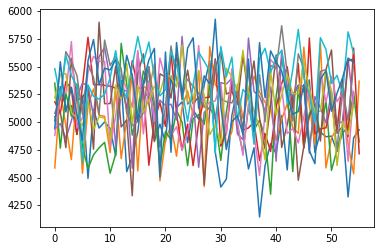

Test sensitivity 0.75
RAT 0 has 55 MC runs
RAT 10 has 55 MC runs
RAT 20 has 55 MC runs
RAT 30 has 55 MC runs
RAT 40 has 55 MC runs
RAT 50 has 55 MC runs
RAT 60 has 55 MC runs
RAT 70 has 55 MC runs
RAT 80 has 55 MC runs
RAT 90 has 55 MC runs
RAT 100 has 55 MC runs


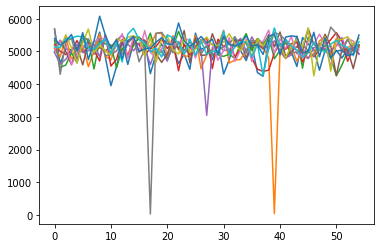

Test sensitivity 0.8
RAT 0 has 54 MC runs
RAT 10 has 54 MC runs
RAT 20 has 55 MC runs
RAT 30 has 55 MC runs
RAT 40 has 55 MC runs
RAT 50 has 55 MC runs
RAT 60 has 55 MC runs
RAT 70 has 55 MC runs
RAT 80 has 55 MC runs
RAT 90 has 55 MC runs
RAT 100 has 55 MC runs


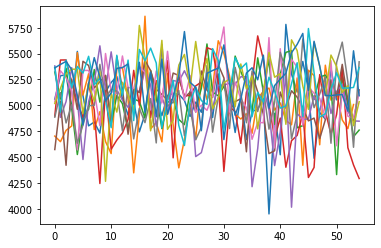

Test sensitivity 0.85
RAT 0 has 52 MC runs
RAT 10 has 52 MC runs
RAT 20 has 52 MC runs
RAT 30 has 52 MC runs
RAT 40 has 53 MC runs
RAT 50 has 53 MC runs
RAT 60 has 53 MC runs
RAT 70 has 53 MC runs
RAT 80 has 54 MC runs
RAT 90 has 54 MC runs
RAT 100 has 53 MC runs


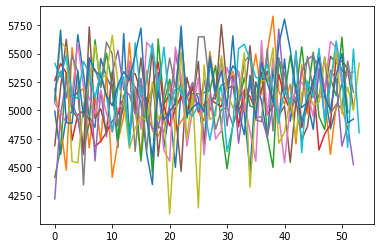

Test sensitivity 0.9
RAT 0 has 51 MC runs
RAT 10 has 51 MC runs
RAT 20 has 50 MC runs
RAT 30 has 50 MC runs
RAT 40 has 50 MC runs
RAT 50 has 50 MC runs
RAT 60 has 50 MC runs
RAT 70 has 50 MC runs
RAT 80 has 50 MC runs
RAT 90 has 49 MC runs
RAT 100 has 49 MC runs


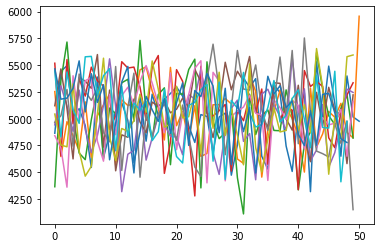

Test sensitivity 0.95
RAT 0 has 49 MC runs
RAT 10 has 49 MC runs
RAT 20 has 49 MC runs
RAT 30 has 49 MC runs
RAT 40 has 49 MC runs
RAT 50 has 47 MC runs
RAT 60 has 47 MC runs
RAT 70 has 47 MC runs
RAT 80 has 47 MC runs
RAT 90 has 47 MC runs
RAT 100 has 47 MC runs


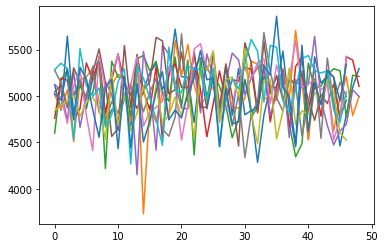

3475


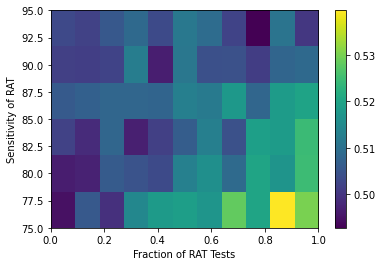

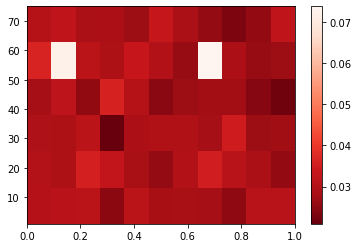

In [7]:
### Printing 1% results ###

tss = [0.7,0.75,0.8,0.85,0.9,0.95]
trs = [0.1, 0.5]

results_1_p = np.zeros((len(tss),11))
std_ar_1_p = np.zeros((len(tss),11))


T_mc_count_1_p = 0
for i in range(0,len(tss)):
    print("Test sensitivity",tss[i])
    results_1_p[i],std_ar_1_p[i],mc_count = split_test_ratio(split_sensitivity(split_test_rate(targetted_txt_files,0.1), tss[i]))
    T_mc_count_1_p += mc_count

print(T_mc_count_1_p)
# print(results)
# print(std_ar)

res_map_1_p = plt.imshow(results_1_p,aspect="auto",extent=[0,1,75,95],origin='lower')#,interpolation="bilinear")
plt.colorbar()
plt.xlabel("Fraction of RAT Tests")
plt.ylabel("Sensitivity of RAT")
plt.show()

std_map_1_p = plt.imshow(std_ar_1_p,aspect="auto",extent=[0,1,0.95,75])
std_map_1_p.set_cmap("Reds_r")
plt.colorbar()
plt.show()


Test sensitivity 0.7
RAT 0 has 56 MC runs
RAT 10 has 56 MC runs
RAT 20 has 56 MC runs
RAT 30 has 56 MC runs
RAT 40 has 55 MC runs
RAT 50 has 55 MC runs
RAT 60 has 55 MC runs
RAT 70 has 55 MC runs
RAT 80 has 55 MC runs
RAT 90 has 55 MC runs
RAT 100 has 55 MC runs


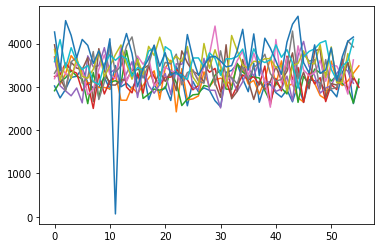

Test sensitivity 0.75
RAT 0 has 55 MC runs
RAT 10 has 55 MC runs
RAT 20 has 55 MC runs
RAT 30 has 55 MC runs
RAT 40 has 55 MC runs
RAT 50 has 55 MC runs
RAT 60 has 55 MC runs
RAT 70 has 55 MC runs
RAT 80 has 55 MC runs
RAT 90 has 55 MC runs
RAT 100 has 55 MC runs


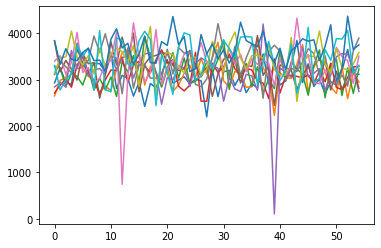

Test sensitivity 0.8
RAT 0 has 54 MC runs
RAT 10 has 54 MC runs
RAT 20 has 54 MC runs
RAT 30 has 55 MC runs
RAT 40 has 55 MC runs
RAT 50 has 55 MC runs
RAT 60 has 55 MC runs
RAT 70 has 55 MC runs
RAT 80 has 55 MC runs
RAT 90 has 55 MC runs
RAT 100 has 55 MC runs


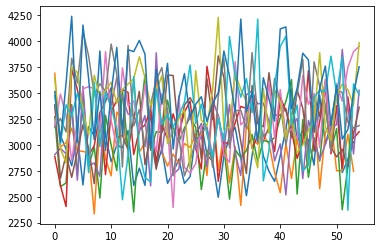

Test sensitivity 0.85
RAT 0 has 52 MC runs
RAT 10 has 52 MC runs
RAT 20 has 52 MC runs
RAT 30 has 52 MC runs
RAT 40 has 53 MC runs
RAT 50 has 53 MC runs
RAT 60 has 53 MC runs
RAT 70 has 53 MC runs
RAT 80 has 54 MC runs
RAT 90 has 53 MC runs
RAT 100 has 53 MC runs


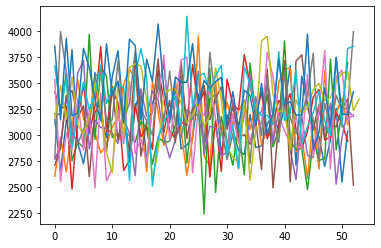

Test sensitivity 0.9
RAT 0 has 51 MC runs
RAT 10 has 51 MC runs
RAT 20 has 51 MC runs
RAT 30 has 50 MC runs
RAT 40 has 50 MC runs
RAT 50 has 50 MC runs
RAT 60 has 50 MC runs
RAT 70 has 50 MC runs
RAT 80 has 50 MC runs
RAT 90 has 50 MC runs
RAT 100 has 49 MC runs


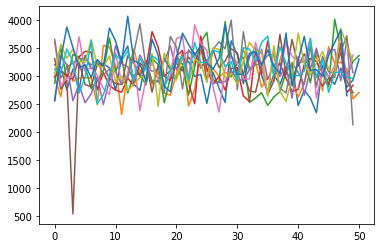

Test sensitivity 0.95
RAT 0 has 49 MC runs
RAT 10 has 49 MC runs
RAT 20 has 49 MC runs
RAT 30 has 49 MC runs
RAT 40 has 49 MC runs
RAT 50 has 47 MC runs
RAT 60 has 47 MC runs
RAT 70 has 47 MC runs
RAT 80 has 47 MC runs
RAT 90 has 47 MC runs
RAT 100 has 47 MC runs


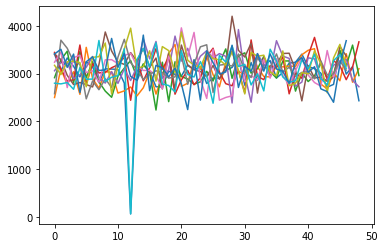

3475


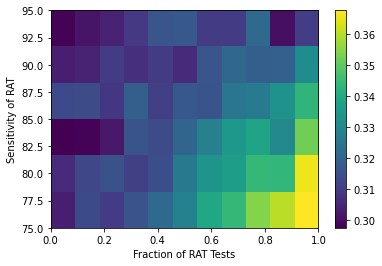

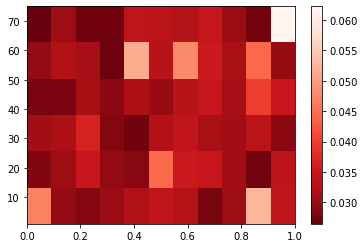

In [8]:
### Printing for 5%

tss = [0.7,0.75,0.8,0.85,0.9,0.95]

results_5_p = np.zeros((len(tss),11))
std_ar_5_p = np.zeros((len(tss),11))


T_mc_count_5_p = 0
for i in range(0,len(tss)):
    print("Test sensitivity",tss[i])
    results_5_p[i],std_ar_5_p[i],mc_count = split_test_ratio(split_sensitivity(split_test_rate(targetted_txt_files,0.5), tss[i]))
    T_mc_count_5_p += mc_count

print(T_mc_count_5_p)
# print(results)
# print(std_ar)

res_map_5_p = plt.imshow(results_5_p,aspect="auto",extent=[0,1,75,95],origin='lower')#,interpolation="bilinear")
plt.colorbar()
plt.xlabel("Fraction of RAT Tests")
plt.ylabel("Sensitivity of RAT")
plt.show()

std_map_5_p = plt.imshow(std_ar_5_p,aspect="auto",extent=[0,1,0.95,75])
std_map_5_p.set_cmap("Reds_r")
plt.colorbar()

plt.show()


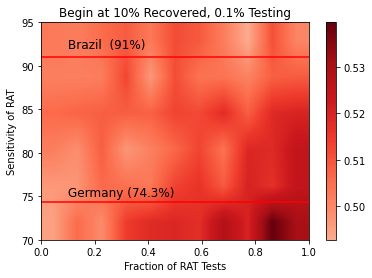

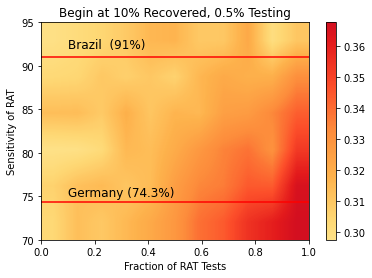

In [11]:
import scipy.ndimage
import matplotlib.cm as cm

plt.title("Begin at 10% Recovered, 0.1% Testing")
res_map_1_p_inter = plt.imshow(results_1_p,aspect="auto",interpolation="bilinear",origin='lower',extent=[0,1,70,95])
plt.colorbar()
# res_map2 = plt.contour(results,20,extent=[0,1,75,95],origin = 'lower')
plt.xlabel("Fraction of RAT Tests")
plt.ylabel("Sensitivity of RAT")
plt.hlines(74.3,0,1,color='r')
plt.hlines(91,0,1,color='r')
plt.text(0.1,92,"Brazil  (91%)",color='black',fontsize=12)
plt.text(0.1,75,"Germany (74.3%)",color='black',fontsize=12)
# plt.clim(0,0.6)
# res_map_1_p_inter.set_cmap("Reds")

second_cmap = truncate_colormap(plt.get_cmap("Reds"),0.3,1.0)
res_map_1_p_inter.set_cmap(plt.get_cmap(second_cmap))
plt.savefig('./HM_Targetted_0.1percent.png',dpi=300,facecolor='w')
plt.show()

# smooth_data = scipy.ndimage.zoom(results,3)

# smooth_map_1_p = plt.imshow(results,aspect="auto",interpolation="bilinear",origin='lower',extent=[0,1,70,95])
# plt.colorbar()
# smooth_map2_1_p = plt.contour(smooth_data,5,extent=[0,1,70,95],origin = 'lower',cmap=cm.Greens_r)
# plt.xlabel("Fraction of RAT Tests")
# plt.ylabel("Sensitivity of RAT")

# plt.show()

plt.title("Begin at 10% Recovered, 0.5% Testing")
res_map_5_p_inter = plt.imshow(results_5_p,aspect="auto",interpolation="bilinear",origin='lower',extent=[0,1,70,95])
plt.colorbar()
# res_map2 = plt.contour(results,20,extent=[0,1,75,95],origin = 'lower')
plt.xlabel("Fraction of RAT Tests")
plt.ylabel("Sensitivity of RAT")
plt.hlines(74.3,0,1,color='r')
plt.hlines(91,0,1,color='r')
plt.text(0.1,92,"Brazil  (91%)",color='black',fontsize=12)
plt.text(0.1,75,"Germany (74.3%)",color='black',fontsize=12)
# plt.clim(0,0.6)
# res_map_5_p_inter.set_cmap("plasma")
# res_map_5_p_inter.set_cmap("YlOrRd")
second_cmap = truncate_colormap(plt.get_cmap("YlOrRd"),0.2,0.8)
res_map_5_p_inter.set_cmap(plt.get_cmap(second_cmap))
plt.savefig('./HM_Targetted_0.5percent.png',dpi=300,facecolor='w')
plt.show()


plt.show()

In [10]:
....

SyntaxError: invalid syntax (<ipython-input-10-7834bfc346aa>, line 1)

In [ ]:
plt.imshow(res_map_10_p, vmin=0.01, vmax=0.99)
res_map_10_p_inter.set_cmap("inferno")

<IPython.core.display.Javascript object>


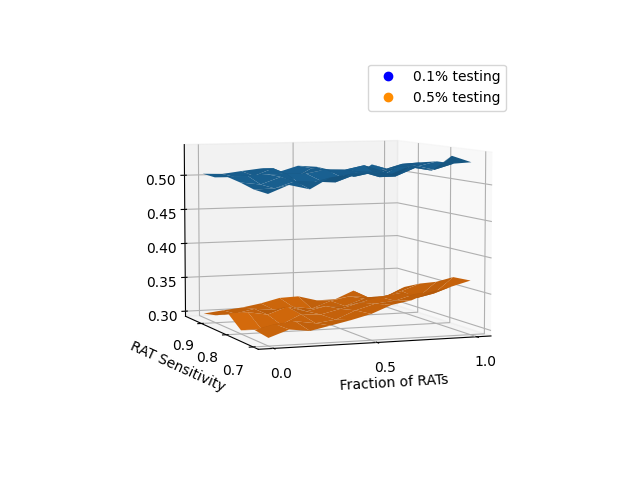

In [19]:
%matplotlib notebook

import numpy
import matplotlib.pyplot as plt
from matplotlib import lines
from mpl_toolkits.mplot3d import Axes3D

# Set up grid and test data
# nx, ny = 1, 3
# x = range(nx)
# y = range(ny)

x = np.linspace(0,1,11)
y = np.array([0.7,0.75,0.8,0.85,0.9,0.95])

# data = results

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, results_1_p)

ha.plot_surface(X, Y, results_5_p)
# ha.plot_surface(X, Y, results_10_p)

fake2Dline_1 = lines.Line2D([0],[0], linestyle="none", c='b', marker = 'o')
fake2Dline_5 = lines.Line2D([0],[0], linestyle="none", c='darkorange', marker = 'o')
fake2Dline_10 = lines.Line2D([0],[0], linestyle="none", c='g', marker = 'o')

# ha.contour3D(X,Y,data,200)

plt.locator_params(axis = 'y', nbins = 1)
plt.locator_params(axis = 'x', nbins = 3)


plt.ylabel("RAT Sensitivity")
plt.xlabel("Fraction of RATs")
plt.legend([fake2Dline_1,fake2Dline_5],["0.1% testing","0.5% testing"],numpoints=1)

plt.show()

In [16]:
def js(files,choice):
    # split by test-rates

    z = []
    p1  = []
    p2 = []
    p3  = []
    p4 = []
    p5  = []
    p6 = []
    p7 = []
    p8 = []
    p9 = []
    p10= []
    
    for i in range(0,len(files)):
        if(files[i].split("_")[8] == "0.0"):
            z.append(files[i])
        elif(files[i].split("_")[8] == "0.1"):
            p1.append(files[i])
        elif(files[i].split("_")[8] == "0.2"):
            p2.append(files[i])
        elif(files[i].split("_")[8] == "0.3"):
            p3.append(files[i])
        elif(files[i].split("_")[8] == "0.4"):
            p4.append(files[i])
        elif(files[i].split("_")[8] == "0.5"):
            p5.append(files[i])
        elif(files[i].split("_")[8] == "0.6"):
            p6.append(files[i])
        elif(files[i].split("_")[8] == "0.7"):
            p7.append(files[i])
        elif(files[i].split("_")[8] == "0.8"):
            p8.append(files[i])
        elif(files[i].split("_")[8] == "0.9"):
            p9.append(files[i])
        elif(files[i].split("_")[8] == "1.0"):
            p10.append(files[i])
            

    n_pop = 10000
   
    if(choice==0):
        return 0
    elif(choice==0.1):
        return p1
    elif(choice==0.2):
        return p2
    elif(choice==0.3):
        return p3
    elif(choice==0.4):
        return p4
    elif(choice==0.5):
        return p5
    elif(choice==0.6):
        return p6
    elif(choice==0.7):
        return p7
    elif(choice==0.8):
        return p8
    elif(choice==0.9):
        return p9
    elif(choice==1):
        return p10

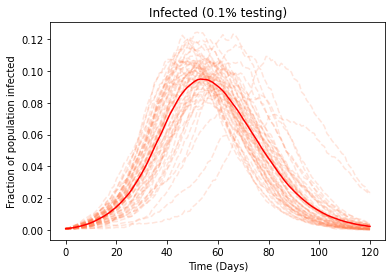

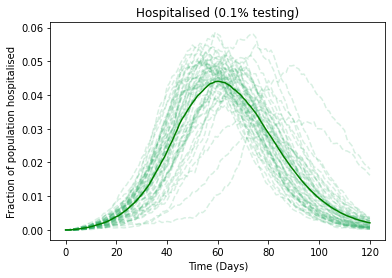

In [17]:
r = js(split_sensitivity(split_test_rate(targetted_txt_files,0.1), 0.75),0.9)
inf = []
hos = []
for i in range(0,len(r)):
    
    file = np.genfromtxt(r[i],delimiter=" ", comments="#")
    inf.append(file[:,2]+file[:,3]+file[:,5])
    hos.append(file[:,5])

inf = np.array(inf)
hos = np.array(hos)

inf_av = np.zeros(121)

plt.title("Infected (0.1% testing)")
for i in range(0,len(inf)):
    plt.plot(np.linspace(0,120,121),inf[i]/10000,'--',color='coral',alpha=0.2)
    inf_av = inf_av + inf[i]
inf_av = inf_av/len(inf)/10000
plt.plot(np.linspace(0,120,121),inf_av,'r')
plt.ylabel("Fraction of population infected")
plt.xlabel("Time (Days)")
# plt.savefig("./targ_fraction_infected_1percent.png",dpi=100,facecolor='w')
plt.show()

hos_av = np.zeros(121)
plt.title("Hospitalised (0.1% testing)")
for i in range(0,len(inf)):
    plt.plot(np.linspace(0,120,121),hos[i]/10000,'--',color='mediumseagreen',alpha=0.2)
    hos_av = hos_av + hos[i]
hos_av = hos_av/len(hos)/10000
plt.plot(np.linspace(0,120,121),hos_av,'green')
plt.ylabel("Fraction of population hospitalised")
plt.xlabel("Time (Days)")
# plt.savefig("./targ_fraction_hospitalised_1percent.png",dpi=100,facecolor='w')
plt.show()

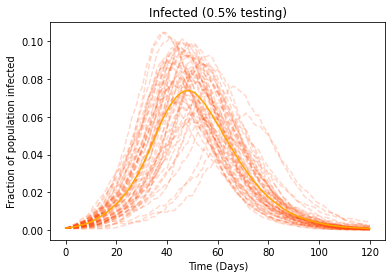

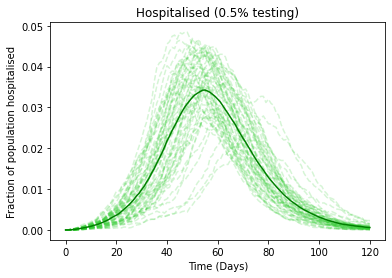

In [18]:
r = js(split_sensitivity(split_test_rate(targetted_txt_files,0.5), 0.75),0.9)
inf = []
hos = []
for i in range(0,len(r)):
    
    file = np.genfromtxt(r[i],delimiter=" ", comments="#")
    inf.append(file[:,2]+file[:,3]+file[:,5])
    hos.append(file[:,5])

inf = np.array(inf)
hos = np.array(hos)

inf_av = np.zeros(121)

inf_av = np.zeros(121)

plt.title("Infected (0.5% testing)")
for i in range(0,len(inf)):
    plt.plot(np.linspace(0,120,121),inf[i]/10000,'--',color='orangered',alpha=0.2)
    inf_av = inf_av + inf[i]
inf_av = inf_av/len(inf)/10000
plt.plot(np.linspace(0,120,121),inf_av,'orange')
plt.ylabel("Fraction of population infected")
plt.xlabel("Time (Days)")
# plt.savefig("./targ_fraction_infected_5percent.png",dpi=100,facecolor='w')
plt.show()

hos_av = np.zeros(121)
plt.title("Hospitalised (0.5% testing)")
for i in range(0,len(inf)):
    plt.plot(np.linspace(0,120,121),hos[i]/10000,'--',color='limegreen',alpha=0.2)
    hos_av = hos_av + hos[i]
hos_av = hos_av/len(hos)/10000
plt.plot(np.linspace(0,120,121),hos_av,'green')
plt.ylabel("Fraction of population hospitalised")
plt.xlabel("Time (Days)")
# plt.savefig("./targ_fraction_hospitalised_5percent.png",dpi=100,facecolor='w')
plt.show()